In [1]:
import lighthouse as lh

# lh.isochrone.get_isochrones.get_mist_isochrones()
# lh.stellar_atmosphere_spectrum.get_stellar_templates.get_polynomial_coefficients_villaume2017a()

In [2]:
import matplotlib.pyplot as plt 

import torch 

import sedpy


In [3]:
S = lh.SSP.Basic_SSP(
    lh.isochrone.MIST(),
    # lh.initial_mass_function.Kroupa(),
    lh.initial_mass_function.Salpeter(),
    lh.stellar_atmosphere_spectrum.PolynomialEvaluator(),
    )

In [4]:
import pandas as pd
import numpy as np

fname = '/Users/alexa/Documents/Create_SSPs/CheckModels/vcj_cc8_Zp0.00_t13.5.ssp'

alf_ssps = pd.read_csv(fname, delim_whitespace=True,
                        header=0)

# fname = '/Users/alexa/NonSolarModels/TheModels/AlfModels/CvD_t13.5_newer.ssp'
# fname = '/Users/alexa/NonSolarModels/TheModels/NewModels/m0.00_t13.5.ssp'
fname = '/Users/alexa/NonSolarModels/TheModels/NewModels/m0.00_t13.5_v4.ssp'

other_alf = np.loadtxt(fname)

ssp = S.forward(torch.tensor(0., dtype = torch.float64), 
                torch.tensor(10.3, dtype = torch.float64), 
                torch.tensor([2.3, 2.3, 2.3]))


tensor(315.8481, dtype=torch.float64)
tensor(337.3926, dtype=torch.float64)
839.2873402460856


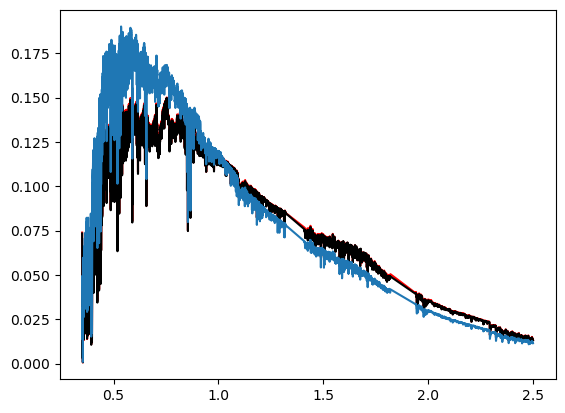

In [5]:

# plt.plot(other_alf[:,0], other_alf[:,4], color='r')
plt.plot(other_alf[:,0], other_alf[:,3], color='r')

# plt.plot(alf_ssps['wavelength']*1e-4, alf_ssps['kroupa'], color='k')
plt.plot(alf_ssps['wavelength']*1e-4, alf_ssps['salp'], color='k')

plt.plot(S.sas.wavelength, ssp)
plt.show()

In [6]:
# filters = np.loadtxt('/Users/alexa/alf/infiles/filters_rIK.dat')


# plt.plot(filters[:,0], filters[:,3])
# plt.show()

In [7]:
# # mask = ((S.isochrone.metallicities >= -2.50) & 
# #         (S.isochrone.metallicities <= +0.50) )

# mask = ((S.isochrone.metallicities >= -2.50) & 
#         (S.isochrone.metallicities < +0.50)  & # I don't know what's going wrong here...
#         (S.isochrone.metallicities != -0.50))  # ...or here. Just going to ignore for now. 


# # mask = (S.isochrone.metallicities == 0.0)

# from sedpy import observate 

# kband = observate.Filter("twomass_Ks.par")
# kmsun_ab = 5.14

# m2l_ratios = []

# for metallicity in S.isochrone.metallicities[mask]:

#     ssp = S.forward(metallicity, torch.tensor(10.0, dtype  = torch.float64), torch.tensor([2.3, 2.3, 2.3]))

#     # # Output alf spectra are in units of L_sun/micon (l_lambda)
#     # # Needs to be in cgs f_nu to compute AB mags
#     # # Conversion comes from alf/src/getm2l.f90
#     # # aspec  = spec*lsun/1E6*lam**2/clight/1E8/4/mypi/pc2cm**2
#     # clight = 2.9979E10
#     # lsun   = 3.839E33
#     # pc2cm  = 3.08568E18

#     # lam = S.sas.wavelength * 1e4

#     # aspec = ssp*lsun/1e6*lam**2/clight/1e8/4/np.pi/pc2cm**2

#     # mag = np.trapz(aspec*filters[1:,3]/lam, lam)
#     # mag = (-2.5*np.log10(mag)-48.60)

#     # # print(mag)
#     # # print(S.stellar_mass)
#     # # print(S.formed_mass)
    
#     # m2l_ratios.append( S.stellar_mass/10**(2./5 * (kmsun_ab-mag)) )

#     use = (S.sas.wavelength > 0.38)
#     plt.plot(S.sas.wavelength[use], ssp[use], label=metallicity)

# plt.legend()
# plt.show()


In [8]:

# plt.plot(S.isochrone.metallicities[mask], m2l_ratios)

# plt.ylim(0, 3)